# Lenguajes de programación

No todos los lenguajes de programación son iguales, pero sí existen lenguajes que son similares. JavaScript se parece más a TypeScript que a C, por ejemplo. En el primer modelo que hicimos tomamos a cada lenguaje como una característica independiente pero quizás esto se puede mejorar usando descripciones de los lenguajes de programación en vez de sólo los nombres.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wikipedia
import xml.etree.ElementTree as ET
import re
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
df = pd.read_csv('2020.1 - sysarmy - Encuesta de remuneración salarial Argentina - Argentina.csv', skiprows=9)
df['Lenguajes de programación']

0                                                  Python
1                                                PHP, SQL
2                 CSS, HTML, Javascript, PHP, Python, SQL
3        .NET, C#, CSS, HTML, Javascript, SQL, TypeScript
4                                                     NaN
                              ...                        
5977     .NET, C#, CSS, HTML, Javascript, SQL, TypeScript
5978    .NET, C#, COBOL, CSS, HTML, Java, Javascript, SQL
5979                                                  NaN
5980                .NET, HTML, Javascript, PHP, SQL, VBA
5981                CSS, HTML, Javascript, PHP, Ruby, SQL
Name: Lenguajes de programación, Length: 5982, dtype: object

In [7]:
df_languages_cols = df['Lenguajes de programación'].fillna('').apply(lambda pls: pd.Series([v.lower().strip() for v in pls.split(',') if v.lower().strip() not in ('', 'ninguno')], dtype=str))
count_languages = pd.concat((df_languages_cols[i] for i in range(df_languages_cols.shape[1]))).value_counts()
count_languages

javascript             2339
sql                    2084
html                   1867
java                   1393
python                 1386
                       ... 
no soy programadora       1
spss                      1
ninguna                   1
hack                      1
unix                      1
Length: 187, dtype: int64

In [8]:
count_languages = count_languages[count_languages > 10]
count_languages

javascript      2339
sql             2084
html            1867
java            1393
python          1386
css             1223
php              949
bash/shell       896
.net             848
c#               751
typescript       626
c++              306
c                280
go               267
vba              247
groovy           183
ruby             177
kotlin           152
r                118
swift             95
scala             94
abap              75
objective-c       69
cobol             69
perl              66
delphi            56
dart              52
assembler         44
actionscript      41
matlab            35
powershell        34
smalltalk         30
genexus           19
elixir            16
rust              14
apex              11
dtype: int64

In [9]:
lplbt = wikipedia.page('List_of_programming_languages_by_type')
lplbt

<WikipediaPage 'List of programming languages by type'>

In [10]:
print(lplbt.html())

<div class="mw-parser-output"><div class="shortdescription nomobile noexcerpt noprint searchaux" style="display:none">Wikimedia list article</div>
<table class="vertical-navbox nowraplinks" style="float:right;clear:right;width:22.0em;margin:0 0 1.0em 1.0em;background:#f8f9fa;border:1px solid #aaa;padding:0.2em;border-spacing:0.4em 0;text-align:center;line-height:1.4em;font-size:88%;width:18.0em;"><tbody><tr><th class="navbox-title" style="padding:0.2em 0.4em 0.2em;font-size:145%;line-height:1.2em"><a href="/wiki/Lists_of_programming_languages" title="Lists of programming languages">Programming language<br />lists</a></th></tr><tr><td style="padding:0 0.1em 0.4em;text-align: left;">
<ul><li><a href="/wiki/List_of_programming_languages" title="List of programming languages">Alphabetical</a></li>
<li><a class="mw-selflink selflink">Categorical</a></li>
<li><a href="/wiki/Timeline_of_programming_languages" title="Timeline of programming languages">Chronological</a></li>
<li><a href="/wiki/

In [11]:
root = ET.fromstring(lplbt.html())
root

<Element 'div' at 0x7f2b632f82c0>

In [12]:
current_category = None
languages_categories = {}
all_categories = set()
for el in root.iter('*'):
    if el.attrib.get('class', None) == 'mw-headline':
        current_category = ''.join(el.itertext()).strip()
    if current_category not in (None, 'See also'):
        for li in el.iter('li'):
            lang = ''.join(li.itertext())
            if '\n' in lang: continue
            lang = re.sub(r'(?:\(|–|—|-|and some dialects|,).+', '', lang).strip()
            if lang == '': continue
            if lang not in languages_categories:
                languages_categories[lang] = set()
            languages_categories[lang].add(current_category)
            all_categories.add(current_category)
all_categories

{'Array languages',
 'Authoring languages',
 'Client side',
 'Command line interface languages',
 'Compiled languages',
 'Concurrent languages',
 'Constraint programming languages',
 'Curly-bracket languages',
 'Data-oriented languages',
 'Dataflow languages',
 'Decision table languages',
 'Declarative languages',
 'Educational languages',
 'Esoteric languages',
 'Extension languages',
 'Fourth-generation languages',
 'Garbage collected languages',
 'HDLs for analog circuit design',
 'HDLs for digital circuit design',
 'Imperative languages',
 'Impure',
 'In object code',
 'Interactive mode languages',
 'Interpreted languages',
 'Iterative languages',
 'Languages with automatic reference counting (ARC)',
 'Languages with deterministic memory management',
 'Languages with manual memory management',
 'List-based languages – LISPs',
 'Little languages',
 'Logic-based languages',
 'Machine languages',
 'Metaprogramming languages',
 'Multiparadigm languages',
 'Multiple dispatch',
 'Non-Eng

In [13]:
lang_cats = {}
for lang, lang_cat in languages_categories.items():
    lang_cats[lang.lower()] = {c: c in lang_cat for c in all_categories}

df_lang_cats = pd.DataFrame(lang_cats).T
df_lang_cats

,Multiple dispatch,Languages with deterministic memory management,Languages with manual memory management,Declarative languages,Interpreted languages,Data-oriented languages,Concurrent languages,Dataflow languages,Decision table languages,Non-English-based languages,...,Rule-based languages,Multiparadigm languages,Fourth-generation languages,HDLs for analog circuit design,Logic-based languages,Constraint programming languages,Pure,In object code,Esoteric languages,Single dispatch
a+,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
analytica,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
apl,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
chapel,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fortran 90,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lzx,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
xaml,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
xpath,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
xquery,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df_languages = pd.DataFrame(count_languages.rename('count')).join(df_lang_cats, how='inner')
df_languages

,count,Multiple dispatch,Languages with deterministic memory management,Languages with manual memory management,Declarative languages,Interpreted languages,Data-oriented languages,Concurrent languages,Dataflow languages,Decision table languages,...,Rule-based languages,Multiparadigm languages,Fourth-generation languages,HDLs for analog circuit design,Logic-based languages,Constraint programming languages,Pure,In object code,Esoteric languages,Single dispatch
javascript,2339,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
sql,2084,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
java,1393,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
python,1386,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
php,949,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
c#,751,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
typescript,626,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
c++,306,False,True,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
c,280,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
go,267,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [60]:
df_languages = df_languages.drop(df_languages.sum()[df_languages.sum() <= 1].keys(), axis=1).drop('typescript')
df_languages

,count,Languages with deterministic memory management,Languages with manual memory management,Interpreted languages,Concurrent languages,Interactive mode languages,Array languages,Object-oriented prototype-based languages,Metaprogramming languages,Imperative languages,...,Iterative languages,Curly-bracket languages,Numerical analysis,Reflective Language,Impure,Client side,Multiparadigm languages,Fourth-generation languages,In object code,Single dispatch
javascript,2339,False,False,True,False,True,False,True,False,True,...,False,True,False,True,True,True,True,False,False,False
sql,2084,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
java,1393,False,False,False,False,True,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
python,1386,False,False,True,False,True,False,False,True,True,...,True,False,False,True,True,False,True,False,True,True
php,949,False,False,True,False,True,False,False,False,True,...,True,True,False,True,True,False,True,False,False,True
c#,751,False,False,False,False,False,False,False,False,True,...,True,True,False,True,True,False,True,False,False,True
c++,306,True,True,False,False,False,False,False,True,True,...,False,True,False,False,True,False,True,False,False,True
c,280,True,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
go,267,False,False,False,True,False,False,False,False,True,...,False,True,False,False,False,False,True,False,False,False
groovy,183,False,False,True,False,True,False,False,True,True,...,False,True,False,True,True,False,True,False,False,True


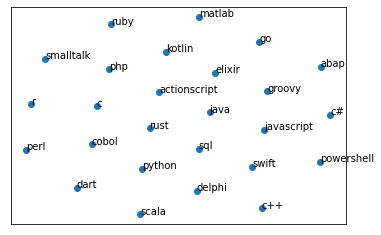

In [61]:
_, ax = plt.subplots(1, 1)
df_languages_embedded = TSNE(n_components=2).fit_transform(df_languages.drop('count', axis=1))
ax.scatter(df_languages_embedded[:, 0], df_languages_embedded[:, 1])
for lang, (x, y) in zip(df_languages.index, df_languages_embedded):
    ax.annotate(lang, (x, y))
ax.set_xticks([]);
ax.set_yticks([]);

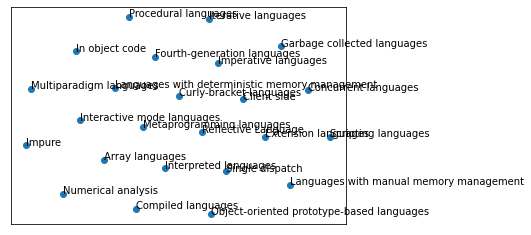

In [62]:
df_corr = df_languages.drop('count', axis=1).corr()
_, ax = plt.subplots(1, 1)
df_corr_embedded = TSNE(n_components=2).fit_transform(df_corr)
ax.scatter(df_corr_embedded[:, 0], df_corr_embedded[:, 1])
for lang, (x, y) in zip(df_corr.index, df_corr_embedded):
    ax.annotate(lang, (x, y))
ax.set_xticks([]);
ax.set_yticks([]);

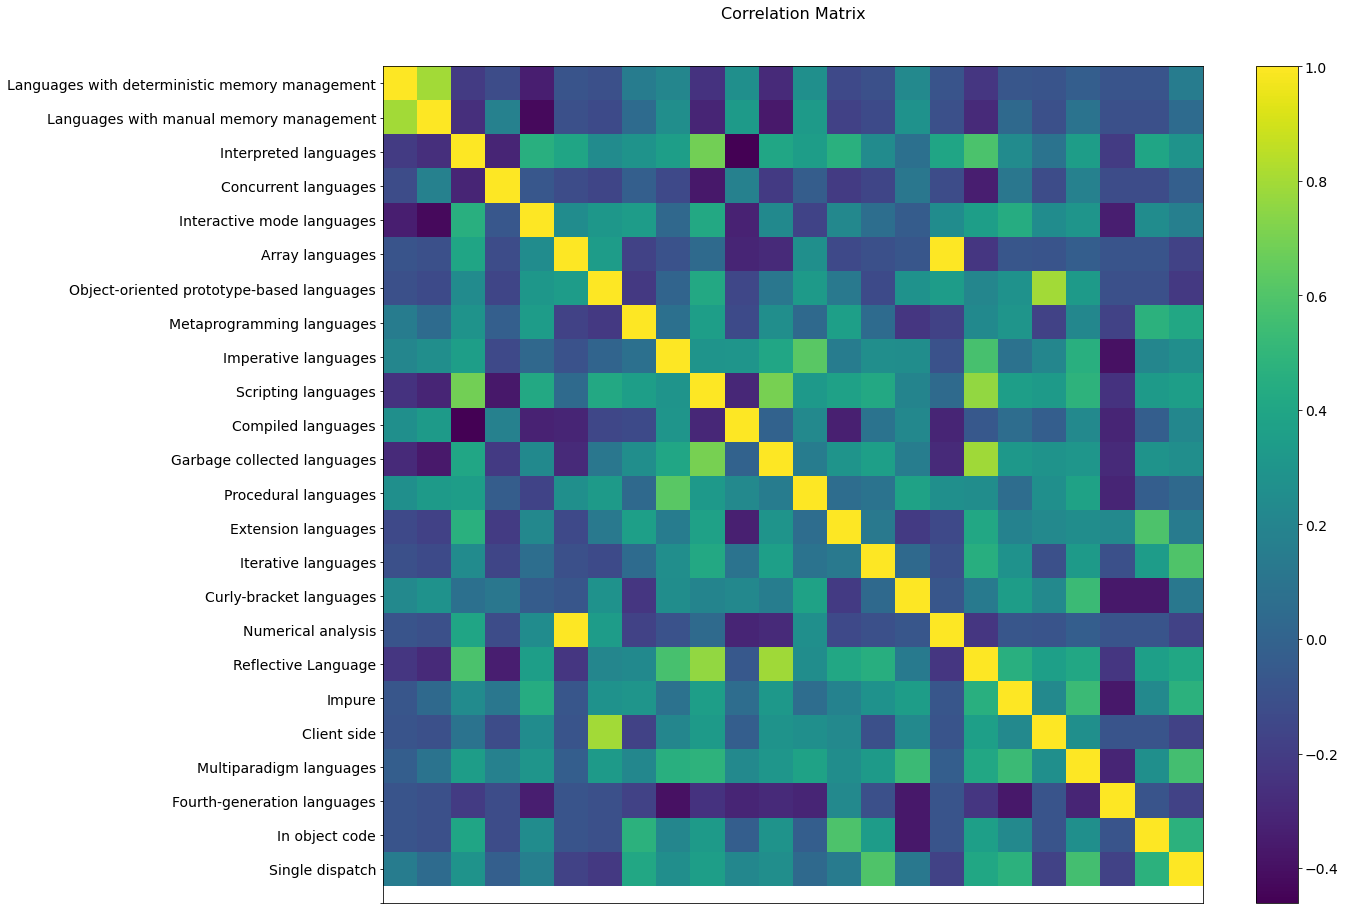

In [63]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_corr, fignum=f.number)
plt.xticks([])
plt.yticks(range(df_languages.shape[1]), df_languages.drop('count', axis=1).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

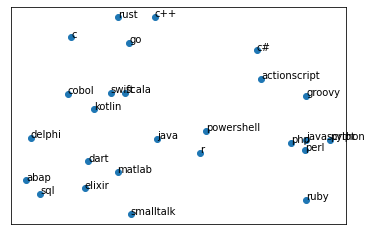

In [97]:
_, ax = plt.subplots(1, 1)
df_languages_embedded = PCA(n_components=2).fit_transform(df_languages.drop('count', axis=1))
ax.scatter(df_languages_embedded[:, 0], df_languages_embedded[:, 1])
for lang, (x, y) in zip(df_languages.index, df_languages_embedded):
    ax.annotate(lang, (x, y))
ax.set_xticks([]);
ax.set_yticks([]);

In [98]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=7, assign_labels="discretize", random_state=0).fit(df_languages_embedded)

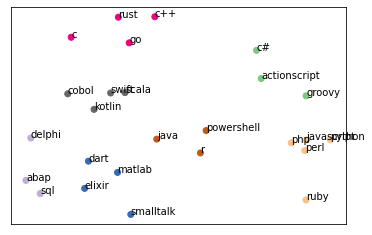

In [107]:
_, ax = plt.subplots(1, 1)
ax.scatter(df_languages_embedded[:, 0], df_languages_embedded[:, 1], c=clustering.labels_, cmap='Accent')
for lang, (x, y) in zip(df_languages.index, df_languages_embedded):
    ax.annotate(lang, (x, y))
ax.set_xticks([]);
ax.set_yticks([]);

In [118]:
language_embeddings = {l: [] for l in clustering.labels_}
for lang, label in zip(df_languages.index, clustering.labels_):
    language_embeddings[label].append(lang)
language_embeddings

{2: ['javascript', 'python', 'php', 'ruby', 'perl'],
 1: ['sql', 'abap', 'delphi'],
 5: ['java', 'r', 'powershell'],
 0: ['c#', 'groovy', 'actionscript'],
 4: ['c++', 'c', 'go', 'rust'],
 6: ['kotlin', 'swift', 'scala', 'cobol'],
 3: ['dart', 'matlab', 'smalltalk', 'elixir']}

In [66]:
df = pd.read_csv('2020.1 - sysarmy - Encuesta de remuneración salarial Argentina - Argentina.csv', skiprows=9)
df = df[df['Salario mensual BRUTO (en tu moneda local)'] < 1_000_000]
df = df[df['Años en la empresa actual'] < 40]
df = df[(df['Salario mensual BRUTO (en tu moneda local)'] >= 10_000) & (df['Salario mensual BRUTO (en tu moneda local)'] <= 1_000_000)]
df.head()

,Me identifico,Tengo,Dónde estás trabajando,Años de experiencia,Años en la empresa actual,Años en el puesto actual,¿Gente a cargo?,Nivel de estudios alcanzado,Estado,Carrera,...,¿Tenés algún tipo de discapacidad?,¿Sentís que esto te dificultó el conseguir trabajo?,¿A qué eventos de tecnología asististe en el último año?,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra,"¿Cuáles considerás que son las mejores empresas de IT para trabajar en este momento, en tu ciudad?"
0,Hombre,40,Catamarca,15.0,0.0,0.0,0,Universitario,Completado,Licenciatura en Sistemas de Información,...,NaN,NaN,NaN,201-500,Otras industrias,6,6,4.0,"Comidas pagas / subvencionadas, Estacionamient...",NaN
1,Mujer,35,Catamarca,15.0,10.0,3.0,5,Posgrado,Completado,Licenciatura en Sistemas de Información,...,NaN,No,NaN,11-50,Servicios / Consultoría de Software / Digital,5,8,2.0,Abono de celular y/o Internet,NaN
2,Hombre,39,Chaco,10.0,5.0,5.0,6,Universitario,Incompleto,Ingeniería en Sistemas de Información,...,NaN,NaN,Ekoparty,11-50,Servicios / Consultoría de Software / Digital,10,10,1.0,"Capacitaciones y/o cursos, Clases de idiomas, ...",NaN
3,Hombre,42,Chaco,18.0,3.0,3.0,0,Universitario,Completado,Licenciatura en Análisis de Sistemas,...,NaN,No,NaN,11-50,Producto basado en Software,5,3,-1.0,"Horarios flexibles, Sueldo dolarizado, WFH (Tr...",NaN
4,Hombre,29,Chaco,4.0,0.0,0.0,1,Universitario,Completado,Ingeniería Electrónica,...,NaN,NaN,"Pynea, Autodefensa digital",201-500,Otras industrias,8,9,5.0,"Abono de celular y/o Internet, Comidas pagas /...",NaN


In [76]:
best = {'colsample_bytree': 0.7000000000000001, 'gamma': 0.8500000000000001, 'learning_rate': 0.025, 'max_depth': 16, 'min_child_weight': 15.0, 'n_estimators': 175, 'subsample': 0.8099576733552297}
regions_map = {
    'Ciudad Autónoma de Buenos Aires': 'AMBA',
    'GBA': 'AMBA',
    'Catamarca': 'NOA',
    'Chaco': 'NEA',
    'Chubut': 'Patagonia',
    'Corrientes': 'NEA',
    'Entre Ríos': 'NEA',
    'Formosa': 'NEA',
    'Jujuy': 'NOA',
    'La Pampa': 'Pampa',
    'La Rioja': 'NOA',
    'Mendoza': 'Cuyo',
    'Misiones': 'NEA',
    'Neuquén': 'Patagonia',
    'Río Negro': 'Patagonia',
    'Salta': 'NOA',
    'San Juan': 'Cuyo',
    'San Luis': 'Cuyo',
    'Santa Cruz': 'Patagonia',
    'Santa Fe': 'Pampa',
    'Santiago del Estero': 'NOA',
    'Tucumán': 'NOA',
    'Córdoba': 'Pampa',
    'Provincia de Buenos Aires': 'Pampa',
    'Tierra del Fuego': 'Patagonia',
}
class BaseModel:
    def __init__(self, **params):
        self.regressor_ = xgb.XGBRegressor(**params)

    def get_params(self, deep=True):
        return self.regressor_.get_params(deep=deep)

    def set_params(self, **params):
        return self.regressor_.set_params(**params)
    
    def clean_words(self, field, value):
        value = value.replace('Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'Microsoft Azure(TablesCosmosDBSQLetc)')
        value = value.replace('Snacks, golosinas, bebidas', 'snacks')
        value = value.replace('Descuentos varios (Clarín 365, Club La Nación, etc)', 'descuentos varios')
        value = value.replace('Sí, de forma particular', 'de forma particular')
        value = value.replace('Sí, los pagó un empleador', 'los pagó un empleador')
        value = value.replace('Sí, activa', 'activa')
        value = value.replace('Sí, pasiva', 'pasiva')
        return [self.clean_word(field, v) for v in value.split(',') if self.clean_word(field, v)]

    def clean_word(self, field, word):
        val = str(word).lower().strip().replace(".", "")
        if val in ('ninguno', 'ninguna', 'no', '0', 'etc)', 'nan'):
            return ''
        if field == 'Lenguajes de programación' and val == 'Microsoft Azure(TablesCosmosDBSQLetc)':
            return 'Microsoft Azure (Tables, CosmosDB, SQL, etc)'
        if field == '¿A qué eventos de tecnología asististe en el último año?' and val in ('pycon', 'pyconar'):
            return 'pyconar'
        if field == '¿A qué eventos de tecnología asististe en el último año?' and val in ('nodeconf', 'nodeconfar'):
            return 'nodeconfar'
        if field == '¿A qué eventos de tecnología asististe en el último año?' and val in ('meetup', 'meetups'):
            return 'meetups'
        if field == '¿A qué eventos de tecnología asististe en el último año?':
            return val.replace(' ', '')
        if field == 'Beneficios extra' and val == 'snacks':
            return 'snacks, golosinas, bebidas'
        if field == 'Beneficios extra' and val == 'descuentos varios':
            return 'descuentos varios (clarín 365, club la nación, etc)'
        return val

    def row_to_words(self, row):
        return [
            f'{key}={row.fillna("")[key]}'
            for key
            in (
                'Me identifico',
                'Nivel de estudios alcanzado',
                'Universidad',
                'Estado',
                'Carrera',
                '¿Contribuís a proyectos open source?',
                '¿Programás como hobbie?',
                'Trabajo de',
                '¿Qué SO usás en tu laptop/PC para trabajar?',
                '¿Y en tu celular?',
                'Tipo de contrato',
                'Orientación sexual',
                'Cantidad de empleados',
                'Actividad principal',
            )
        ] + [
            f'{k}={v}' for k in (
                '¿Tenés guardias?',
                'Realizaste cursos de especialización',
                '¿A qué eventos de tecnología asististe en el último año?',
                'Beneficios extra',
                'Plataformas',
                'Lenguajes de programación',
                'Frameworks, herramientas y librerías',
                'Bases de datos',
                'QA / Testing',
                'IDEs',
                'Lenguajes de programación'
            ) for v in self.clean_words(k, row.fillna('')[k])
        ] + [
            f'region={regions_map[row["Dónde estás trabajando"]]}'
        ]

    def encode_row(self, row):
        ws = self.row_to_words(row)
        return pd.Series([w in ws for w in self.valid_words_] + [
            row['¿Gente a cargo?'],
            row['Años de experiencia'],
            row['Tengo'],
        ])

    def fit(self, X, y, **params):
        counts = {}
        for i in range(X.shape[0]):
            for word in self.row_to_words(X.iloc[i]):
                counts[word] = counts.get(word, 0) + 1
        self.valid_words_ = [word for word, c in counts.items() if c > 0.01*X.shape[0]]
        self.regressor_.fit(X.apply(self.encode_row, axis=1).astype(float), y, **params)
        return self
   
    def predict(self, X):
        return self.regressor_.predict(X.apply(self.encode_row, axis=1).astype(float))
    
    def score(self, X, y):
        return r2_score(y, self.predict(X))
cross_val_score(BaseModel(), df, df['Salario mensual BRUTO (en tu moneda local)'])

array([0.49657124, 0.35863404, 0.54711517, 0.4280007 , 0.47291457])

In [132]:
class ModelPCA:
    def __init__(self, **params):
        self.regressor_ = xgb.XGBRegressor(**params)

    def get_params(self, deep=True):
        return self.regressor_.get_params(deep=deep)

    def set_params(self, **params):
        return self.regressor_.set_params(**params)
    
    def clean_words(self, field, value):
        value = value.replace('Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'Microsoft Azure(TablesCosmosDBSQLetc)')
        value = value.replace('Snacks, golosinas, bebidas', 'snacks')
        value = value.replace('Descuentos varios (Clarín 365, Club La Nación, etc)', 'descuentos varios')
        value = value.replace('Sí, de forma particular', 'de forma particular')
        value = value.replace('Sí, los pagó un empleador', 'los pagó un empleador')
        value = value.replace('Sí, activa', 'activa')
        value = value.replace('Sí, pasiva', 'pasiva')
        return [self.clean_word(field, v) for v in value.split(',') if self.clean_word(field, v)]

    def clean_word(self, field, word):
        val = str(word).lower().strip().replace(".", "")
        if val in ('ninguno', 'ninguna', 'no', '0', 'etc)', 'nan'):
            return ''
        if field == 'Lenguajes de programación' and val == 'Microsoft Azure(TablesCosmosDBSQLetc)':
            return 'Microsoft Azure (Tables, CosmosDB, SQL, etc)'
        if field == '¿A qué eventos de tecnología asististe en el último año?' and val in ('pycon', 'pyconar'):
            return 'pyconar'
        if field == '¿A qué eventos de tecnología asististe en el último año?' and val in ('nodeconf', 'nodeconfar'):
            return 'nodeconfar'
        if field == '¿A qué eventos de tecnología asististe en el último año?' and val in ('meetup', 'meetups'):
            return 'meetups'
        if field == '¿A qué eventos de tecnología asististe en el último año?':
            return val.replace(' ', '')
        if field == 'Beneficios extra' and val == 'snacks':
            return 'snacks, golosinas, bebidas'
        if field == 'Beneficios extra' and val == 'descuentos varios':
            return 'descuentos varios (clarín 365, club la nación, etc)'
        return val

    def contains_language(self, row, languages):
        k = 'Lenguajes de programación'
        for v in self.clean_words(k, row.fillna('')[k]):
            if v in languages:
                return True
        return False

    def row_to_words(self, row):
        return [
            f'{key}={row.fillna("")[key]}'
            for key
            in (
                'Me identifico',
                'Nivel de estudios alcanzado',
                'Universidad',
                'Estado',
                'Carrera',
                '¿Contribuís a proyectos open source?',
                '¿Programás como hobbie?',
                'Trabajo de',
                '¿Qué SO usás en tu laptop/PC para trabajar?',
                '¿Y en tu celular?',
                'Tipo de contrato',
                'Orientación sexual',
                'Cantidad de empleados',
                'Actividad principal',
            )
        ] + [
            f'{k}={v}' for k in (
                '¿Tenés guardias?',
                'Realizaste cursos de especialización',
                '¿A qué eventos de tecnología asististe en el último año?',
                'Beneficios extra',
                'Plataformas',
                'Frameworks, herramientas y librerías',
                'Bases de datos',
                'QA / Testing',
                'IDEs',
            ) for v in self.clean_words(k, row.fillna('')[k])
        ] + [
            f'region={regions_map[row["Dónde estás trabajando"]]}'
        ] + [
            f'language_type={i}'
            for i, languages in language_embeddings.items()
            if self.contains_language(row, languages)
        ]

    def encode_row(self, row):
        ws = self.row_to_words(row)
        return pd.Series([w in ws for w in self.valid_words_] + [
            row['¿Gente a cargo?'],
            row['Años de experiencia'],
            row['Tengo'],
        ])

    def fit(self, X, y, **params):
        counts = {}
        for i in range(X.shape[0]):
            for word in self.row_to_words(X.iloc[i]):
                counts[word] = counts.get(word, 0) + 1
        self.valid_words_ = [word for word, c in counts.items() if c > 0.01*X.shape[0]]
        self.regressor_.fit(X.apply(self.encode_row, axis=1).astype(float), y, **params)
        return self
   
    def predict(self, X):
        return self.regressor_.predict(X.apply(self.encode_row, axis=1).astype(float))
    
    def score(self, X, y):
        return r2_score(y, self.predict(X))
cross_val_score(ModelPCA(), df, df['Salario mensual BRUTO (en tu moneda local)'])

array([0.50814827, 0.3751215 , 0.55781311, 0.41742081, 0.43430837])

In [133]:
class ModelPCA:
    def __init__(self, **params):
        self.regressor_ = xgb.XGBRegressor(**params)

    def get_params(self, deep=True):
        return self.regressor_.get_params(deep=deep)

    def set_params(self, **params):
        return self.regressor_.set_params(**params)
    
    def clean_words(self, field, value):
        value = value.replace('Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'Microsoft Azure(TablesCosmosDBSQLetc)')
        value = value.replace('Snacks, golosinas, bebidas', 'snacks')
        value = value.replace('Descuentos varios (Clarín 365, Club La Nación, etc)', 'descuentos varios')
        value = value.replace('Sí, de forma particular', 'de forma particular')
        value = value.replace('Sí, los pagó un empleador', 'los pagó un empleador')
        value = value.replace('Sí, activa', 'activa')
        value = value.replace('Sí, pasiva', 'pasiva')
        return [self.clean_word(field, v) for v in value.split(',') if self.clean_word(field, v)]

    def clean_word(self, field, word):
        val = str(word).lower().strip().replace(".", "")
        if val in ('ninguno', 'ninguna', 'no', '0', 'etc)', 'nan'):
            return ''
        if field == 'Lenguajes de programación' and val == 'Microsoft Azure(TablesCosmosDBSQLetc)':
            return 'Microsoft Azure (Tables, CosmosDB, SQL, etc)'
        if field == '¿A qué eventos de tecnología asististe en el último año?' and val in ('pycon', 'pyconar'):
            return 'pyconar'
        if field == '¿A qué eventos de tecnología asististe en el último año?' and val in ('nodeconf', 'nodeconfar'):
            return 'nodeconfar'
        if field == '¿A qué eventos de tecnología asististe en el último año?' and val in ('meetup', 'meetups'):
            return 'meetups'
        if field == '¿A qué eventos de tecnología asististe en el último año?':
            return val.replace(' ', '')
        if field == 'Beneficios extra' and val == 'snacks':
            return 'snacks, golosinas, bebidas'
        if field == 'Beneficios extra' and val == 'descuentos varios':
            return 'descuentos varios (clarín 365, club la nación, etc)'
        return val

    def contains_language(self, row, languages):
        k = 'Lenguajes de programación'
        for v in self.clean_words(k, row.fillna('')[k]):
            if v in languages:
                return True
        return False

    def row_to_words(self, row):
        return [
            f'{key}={row.fillna("")[key]}'
            for key
            in (
                'Me identifico',
                'Nivel de estudios alcanzado',
                'Universidad',
                'Estado',
                'Carrera',
                '¿Contribuís a proyectos open source?',
                '¿Programás como hobbie?',
                'Trabajo de',
                '¿Qué SO usás en tu laptop/PC para trabajar?',
                '¿Y en tu celular?',
                'Tipo de contrato',
                'Orientación sexual',
                'Cantidad de empleados',
                'Actividad principal',
            )
        ] + [
            f'{k}={v}' for k in (
                '¿Tenés guardias?',
                'Realizaste cursos de especialización',
                '¿A qué eventos de tecnología asististe en el último año?',
                'Beneficios extra',
                'Plataformas',
                'Frameworks, herramientas y librerías',
                'Bases de datos',
                'QA / Testing',
                'IDEs',
                'Lenguajes de programación'
            ) for v in self.clean_words(k, row.fillna('')[k])
        ] + [
            f'region={regions_map[row["Dónde estás trabajando"]]}'
        ] + [
            f'language_type={i}'
            for i, languages in language_embeddings.items()
            if self.contains_language(row, languages)
        ]

    def encode_row(self, row):
        ws = self.row_to_words(row)
        return pd.Series([w in ws for w in self.valid_words_] + [
            row['¿Gente a cargo?'],
            row['Años de experiencia'],
            row['Tengo'],
        ])

    def fit(self, X, y, **params):
        counts = {}
        for i in range(X.shape[0]):
            for word in self.row_to_words(X.iloc[i]):
                counts[word] = counts.get(word, 0) + 1
        self.valid_words_ = [word for word, c in counts.items() if c > 0.01*X.shape[0]]
        self.regressor_.fit(X.apply(self.encode_row, axis=1).astype(float), y, **params)
        return self
   
    def predict(self, X):
        return self.regressor_.predict(X.apply(self.encode_row, axis=1).astype(float))
    
    def score(self, X, y):
        return r2_score(y, self.predict(X))
cross_val_score(ModelPCA(), df, df['Salario mensual BRUTO (en tu moneda local)'])

array([0.51709948, 0.35404992, 0.56137132, 0.42936529, 0.45471885])